In [1]:
# compare iterative imputation number of iterations for the  horse coilc dataset
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from matplotlib import pyplot

In [2]:
# load dataset
dataframe = read_csv('horse-colic.csv', header=0, na_values='?')

In [3]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [4]:
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>1 0.867 (0.049)
>2 0.871 (0.050)
>3 0.863 (0.055)
>4 0.872 (0.051)
>5 0.873 (0.054)
>6 0.872 (0.053)
>7 0.870 (0.052)
>8 0.873 (0.057)
>9 0.874 (0.056)
>10 0.874 (0.053)
>11 0.870 (0.052)
>12 0.871 (0.051)
>13 0.871 (0.050)
>14 0.867 (0.050)
>15 0.869 (0.049)
>16 0.876 (0.050)
>17 0.870 (0.047)
>18 0.871 (0.056)
>19 0.874 (0.054)
>20 0.869 (0.052)


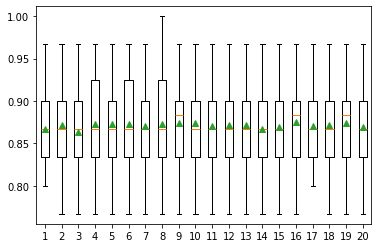

In [5]:
# plot model performnance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()